In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw

import networkx as nx

from utils.graph_utils import *
from dataset.preprocess import *
from predict_logp.predict_logp import *
import torch_geometric as pyg

In [2]:
def read_data(dataset_path):
    all_logp = []
    all_smiles = []
    with open(dataset_path, newline='') as csvfile:
        reader = csv.reader(csvfile)

        for i, (logp, smiles) in enumerate(reader):
            # Some fields are empty, if logp is empty it will be caught by the exception. If smile is empty, conditional kicks in.
            try:
                if smiles is not None:
                    all_logp.append(float(logp))
                    all_smiles.append(smiles)
                else:
                    continue
            except:
                print("Row " + str(i) + "was not read.")
                continue
    return all_logp, all_smiles

In [4]:
scores, smiles = read_data("/Users/ADChen/Downloads/MD/2col/3CLPro_7BQY_A_1_F.Orderable_zinc_db_enaHLL.2col.csv")

Row 6109315was not read.


In [5]:
train_data, valid_data, test_data = create_datasets(scores, smiles)
test_labels = np.array(test_data.logp)

In [21]:
def dock_score_weights(scores):                        
    weights = np.zeros(len(scores))                                          
    for idx, score in enumerate(scores):
        if score < -6:
            weight = 1
        else:
            weight = 0.1
        weights[idx] = weight                               
    return weights      

In [27]:
test_labels

array([-7.554443, -9.330653, -8.967405, ..., -8.842321, -9.187403,
       -7.879792])

In [23]:
_= dock_score_weights(test_labels)

In [34]:
weights = torch.DoubleTensor(_)                                       
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))                     
                                                                                
test_loader = torch.utils.data.DataLoader(test_data, batch_size=512, sampler = sampler, num_workers=24)     

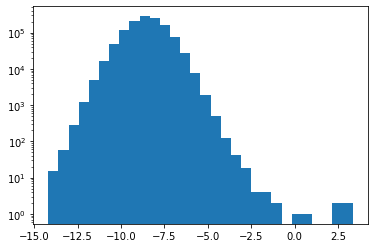

In [9]:
import matplotlib.pyplot as plt
plt.hist(test_labels, bins = 30, log=True);

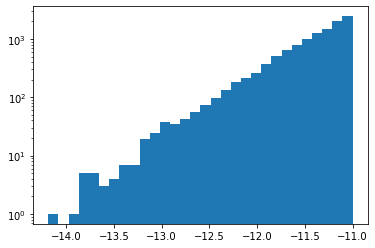

In [10]:
plt.hist(test_labels[test_labels<-11], bins = 30, log=True);

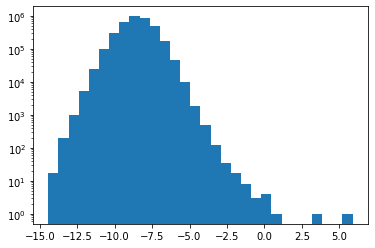

In [15]:
train_labels = np.array(train_data.logp)
plt.hist(train_labels, bins = 30, log=True);

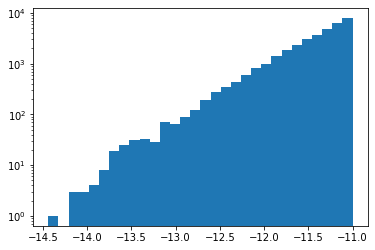

In [16]:
plt.hist(train_labels[train_labels < -11], bins = 30, log=True);